In [2]:
#Написать программу кластеризации данных из этого набора.

In [1]:
#Data-set modules
from sklearn.datasets import load_iris
import pandas as pd
#cluster modules
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy as sch
#Ploting modules
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
def make_2sub_fig(name1,name2):
    #This method generates 2 ploting figure of 2 names
    fig, ax =plt.subplots(1,2)
    fig.set_figheight(6)
    fig.set_figwidth(15)
    ax[0].title.set_text(name1)
    ax[1].title.set_text(name2)
    
    return fig,ax

In [4]:
def cluster_by_knn(points):
    #cluster by k-means in sklearn module
    #cluster
    kmeans=KMeans(n_clusters=4)
    kmeans.fit(points)
    
    km_res=points.copy()
    km_res["cluster"]=kmeans.labels_

    fig, ax =make_2sub_fig('row data frame plot','k-means cluster plot')

    #Show the palette with dots to count required classes
    sns.scatterplot(x='x',y='y',data=points,ax=ax[0])
    sns.scatterplot(x="x",y='y',hue='cluster',data=km_res,palette='Set2',ax=ax[1])
    
    return km_res

In [5]:
def cluster_by_dendrogram(points,cutoff):
    #cluster by dendrogram model form scipy module
    #chose the centroid method
    dend=sch.linkage(points,method='centroid')

    fig2,ax2=make_2sub_fig('dendrogram before cut off',f'dendrogram after cut off({cutoff})') #make 2 figuers to print plot palette

    #make and draw dendrogram with and without cutoff values
    dend_without_cutoff=sch.dendrogram(dend,orientation='right',no_labels=True,ax=ax2[0])
    dendrogram=sch.dendrogram(dend,orientation='right',color_threshold=cutoff,no_labels=True,ax=ax2[1])
    
    #extract clasters from dendrogram 
    dend_dict={}#dictionary as {data_index,class}
    for p,q in zip(dendrogram['ivl'],dendrogram['color_list']):
        q=int(q.replace('C',''))#make classes as interger
        dend_dict[int(p)]=q
    d_so=dict(sorted(dend_dict.items()))
    dend_res=points.copy()
    d_val=list(d_so.values())
    d_val.append(0)#length compensation,adding 0 value as error
    dend_res['cluster']=d_val
    
    return dend_res

In [6]:
def print_scores(iris,data,knn_cluster,dend_cluster):
    #score print from sklearn modules
    #internal scores:
        #Силуэт (англ. Silhouette)
        #Индекс Calinski–Harabasz
    #external scores:
        #Индекс Жаккара (англ. Jaccard Index)
        #Индекс Фоулкса – Мэллова (англ. Fowlkes-Mallows Index)
    from sklearn.metrics import jaccard_score
    from sklearn.metrics import fowlkes_mallows_score
    from sklearn.metrics import silhouette_score
    from sklearn.metrics import calinski_harabasz_score
    
    def print_external_scores(true,target):
        print(f'Jaccard_score =',jaccard_score(y_true=true,y_pred=target,average='macro'))
        print(f'Fowlkes-Mallows score =',fowlkes_mallows_score(labels_true=true,labels_pred=target))
    def print_internal_scores(points,classes):
        print(f'Silhouette score  =',silhouette_score(points,classes))
        print(f'Calinski-Harabasz score =',calinski_harabasz_score(points,classes))
    
    print('internal K-means method scores:')
    print_internal_scores(data,knn_cluster['cluster'])
    print('\ninternal Dendroid method scores:')
    print_internal_scores(data,dend_cluster['cluster'])
    print('\nexternal K-means method scores:')
    print_external_scores(iris.target,knn_cluster['cluster'])
    print('\nexternal Dendroid method scores:')
    print_external_scores(iris.target,dend_cluster['cluster'])

In [7]:
#1. Взять неразмеченный набор данных
#Make iris data-set from sklearn module
iris = load_iris()
sample=iris.data

#Take only length and wigth datas
x=sample[:,0]#length
y=sample[:,1]#wigth
data=pd.DataFrame({'x':x,'y':y})#data frame with chosen datas

internal K-means method scores:
Silhouette score  = 0.4206583419478651
Calinski-Harabasz score = 177.82879804957713

internal Dendroid method scores:
Silhouette score  = 0.31296594347334084
Calinski-Harabasz score = 66.96544180305234

external K-means method scores:
Jaccard_score = 0.037037037037037035
Fowlkes-Mallows score = 0.5596451991234677

external Dendroid method scores:
Jaccard_score = 0.013333333333333332
Fowlkes-Mallows score = 0.6500027464343887


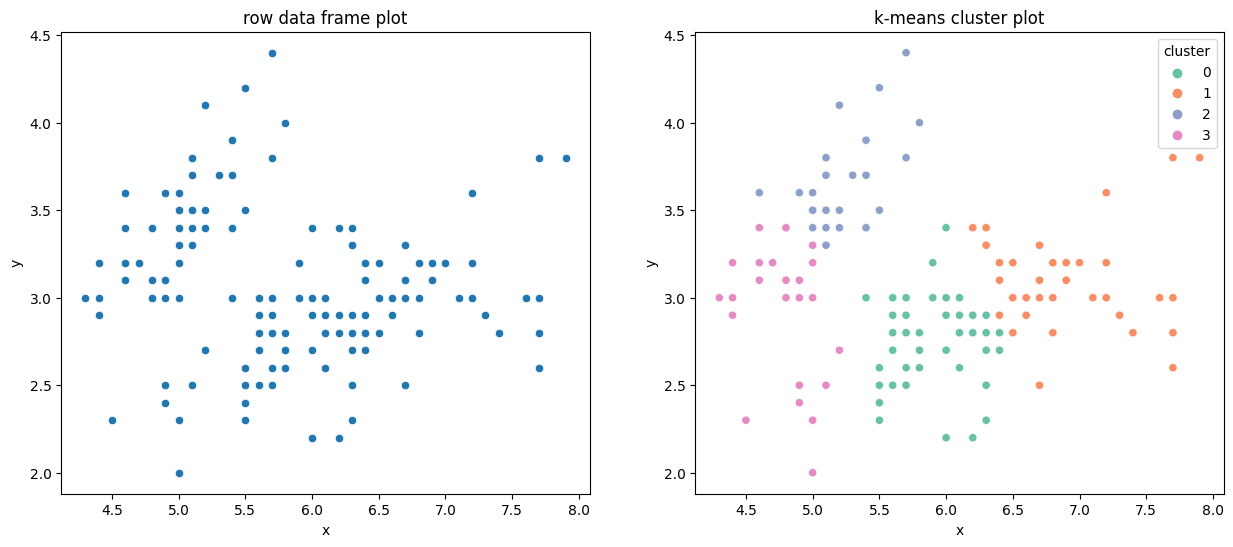

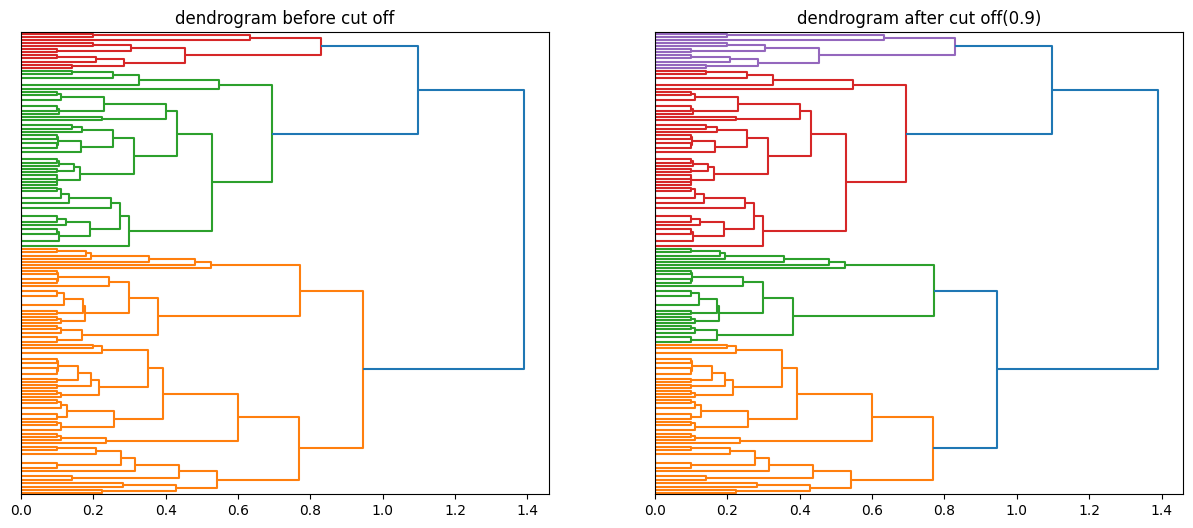

In [8]:
#cluster
knn_cluster=cluster_by_knn(data)
dend_cluster=cluster_by_dendrogram(data,0.9)#used 0.9 for cut off constant

print_scores(iris,data,knn_cluster,dend_cluster)#score print